# Árboles de Decisión 

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from category_encoders import TargetEncoder, OrdinalEncoder, OneHotEncoder
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
import pydotplus
set_config(display = 'diagram')
#dot language
import graphviz

In [2]:
data = {'Salud': ['Enfermo','Enfermo','No enfermo','No enfermo','No enfermo','Enfermo','No enfermo','No enfermo'],
        'Temperatura': ['Baja','Alta','Baja','Baja','Alta','Alta','Baja','Alta'],
       'Salir': ['N','S','S','N','S','N','N','S']}

df = pd.DataFrame(data)
df

,Salud,Temperatura,Salir
0,Enfermo,Baja,N
1,Enfermo,Alta,S
2,No enfermo,Baja,S
3,No enfermo,Baja,N
4,No enfermo,Alta,S
5,Enfermo,Alta,N
6,No enfermo,Baja,N
7,No enfermo,Alta,S


# Funcionamiento Interno de un Árbol de Decisión

![](splits.png)

Se define el Impurity a través de la metrica Gini como: 
$$Gini(t) = 1 - \sum_{c \in C} p_{t,c}^2$$

donde C es el conjunto de clases, $p_{c,t}$ es la probabilidad de ocurrencia de la clase c en el nodo t. 0 implica máxima pureza y 1 significa máxima impureza.

Para decidir en qué nodo debe realizarse el split se escoge el nodo con el GiniSplit con menos Gini Ponderado, que es el que tiene mayor probabilidad de tener nodos resultantes puros.

### Cálculo Salud

$$Gini(enfermo) = 1 - \left(\frac{1}{3}\right)^2 - \left(\frac{2}{3}\right)^2 = 0.444$$
$$Gini(no enfermo) = 1 - \left(\frac{3}{5}\right)^2 - \left(\frac{2}{5}\right)^2 = 0.48$$

$$GiniPonderado = 3/8 * Gini(enfermo) + 5/8 * Gini(no enfermo) = 0.4665$$

### Cálculo Temperatura

$$Gini(alta) = 1 - \left(\frac{3}{4}\right)^2 - \left(\frac{1}{4}\right)^2 = 0.375$$
$$Gini(baja) = 1 - \left(\frac{1}{4}\right)^2 - \left(\frac{3}{4}\right)^2 = 0.375$$

$$GiniPonderado = 4/8 * Gini(alta) + 4/8 * Gini(baja) = 0.375$$

Luego se realiza un split en Temperatura dado que posee un Gini ponderado menor.

## Implementación en Python 

In [3]:
ord_enc = OrdinalEncoder()
df_new = ord_enc.fit_transform(df)

df_new

,Salud,Temperatura,Salir
0,1,1,1
1,1,2,2
2,2,1,2
3,2,1,1
4,2,2,2
5,1,2,1
6,2,1,1
7,2,2,2


In [4]:
X = df_new.drop(columns = 'Salir')
y = df_new.Salir
dt = DecisionTreeClassifier(random_state = 123)
dt.fit(X,y)

## Función de Ploteo built-in en Scikit-Learn

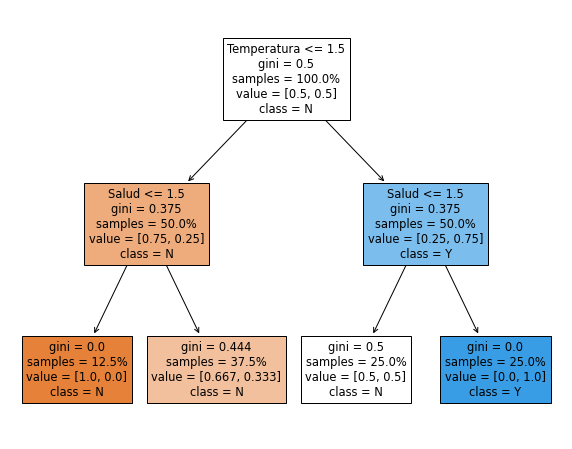

In [4]:
# matplotlib
plt.figure(figsize = (10,8))
plot_tree(dt, feature_names = X.columns, class_names = ['N','Y'], filled = True, proportion = True)
plt.show()

## Implementación utilizando `graphviz` utilizando en lenguaje dot

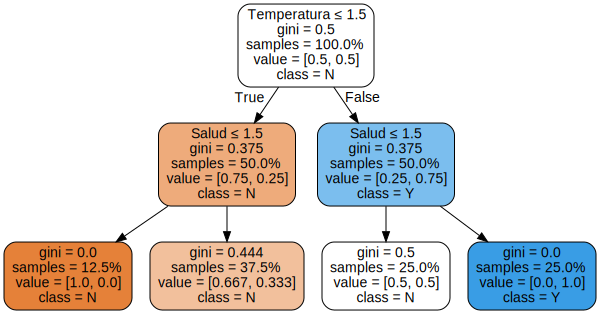

In [5]:
def plot_dt(model, features, classes):
    dot_data = export_graphviz(dt, out_file=None, 
                     feature_names=features,  
                     class_names=classes,  
                     filled=True, rounded=True,  
                     special_characters=True,
                    proportion = True)  
    return graphviz.Source(dot_data)  
plot_dt(dt, X.columns, ['N','Y'])

# Ejemplo de un árbol de Decisión en el dataset Iris 

In [6]:
df = pd.read_csv('iris.csv')
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Hiperparámetros 

La idea es poder mostrar el efecto de distintos hiperparámetros y ver cómo afectan en el prunning del árbol.

Parámetros pre-prunning: 

* max_depth
* min_samples_split
* min_samples_leaf
* min_impurity_decrease

Parámetros post_prunning: 

* ccp_alpha

## Ejemplo de un árbol sobreajusado

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        32
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        33

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.96        45
      macro avg       0.94      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45




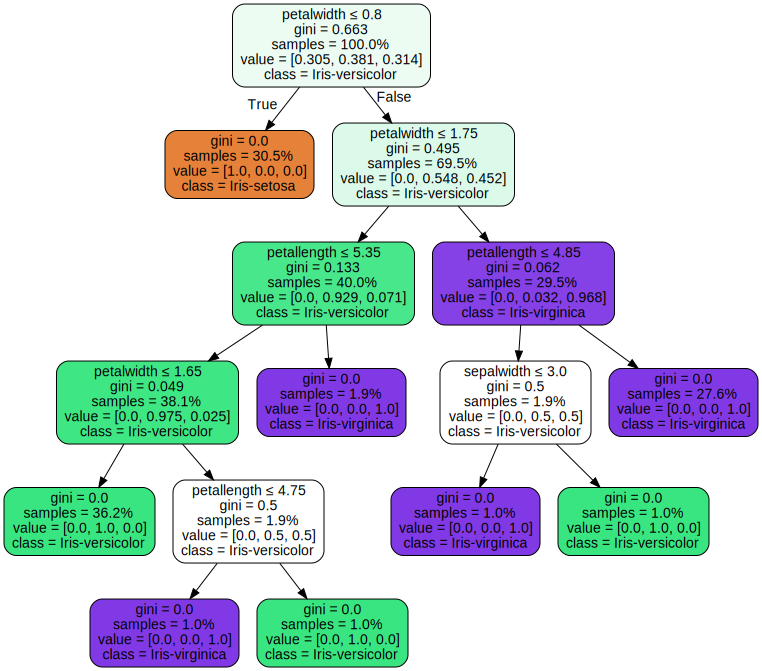

In [7]:
# probar con distintos valores de max_depth 1, 2, 8
# min_samples_split 0.1,0.3, 0.5, para regularizar 
# min_samples_leaf, 0.3,0.5

X = df.drop(columns = 'class')
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)

dt = DecisionTreeClassifier()#max_depth = 8, min_samples_split = 0.3, min_samples_leaf = 0.3, min_impurity_decrease = 0.3)
# mostrar sólo con el árbol
# luegomostrar cómo afecta el performance

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))
print()
plot_dt(dt, X.columns, df['class'].unique())

## Ejemplo de un árbol correctamente ajustado

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        32
Iris-versicolor       0.93      0.97      0.95        40
 Iris-virginica       0.97      0.91      0.94        33

       accuracy                           0.96       105
      macro avg       0.97      0.96      0.96       105
   weighted avg       0.96      0.96      0.96       105

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.96        45
      macro avg       0.94      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45




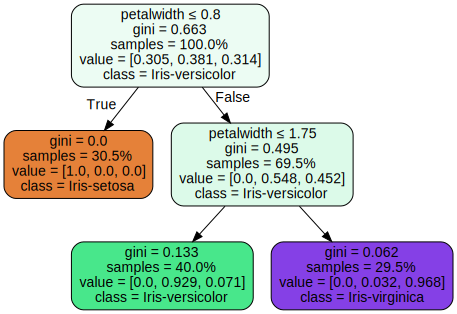

In [8]:
# ccp_alpha = 0.5, 0.3, 0.1
dt = DecisionTreeClassifier(ccp_alpha = 0.1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))
print()
plot_dt(dt, X.columns, df['class'].unique())

# Implementación de un árbol de dcisión utilizando dataset del Titanic 

In [9]:
df = pd.read_csv('titanic.csv', index_col = 0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Signing_date
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1911-05-17
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1911-07-23
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1911-09-08
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1911-06-26
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1911-10-25
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1911-08-17
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1911-08-07
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1912-01-30


## Selección de Variables

Se escogen arbitrariamente algunas variables para mostrar la aplicación de algunos preprocesamiento en una arquitectura de Pipeline.

In [10]:
df = df.drop(columns = ['Signing_date','Cabin','Ticket','Name'])
df[['Pclass','Sex','Embarked']] = df[['Pclass','Sex','Embarked']].astype('category')
df.dtypes

Survived       int64
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

## Selección de Matriz de Predictores y DataSplit 

In [11]:
X = df.drop(columns = 'Survived')
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)

is_cat = X.dtypes == 'category'
is_cat

Pclass       True
Sex          True
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

# Preprocesamiento y GridSearch

Se busca generar un Modelo avanzado en el que se pueda considerar los siguientes efectos:

#### Variables Categóricas

* Imputación de valores perdidos mediante la categoría más común (Moda)
* Binarización mediante OneHotEncoder

#### Variables Numéricas

* Imputación de valores perdidos mediante la media.
* Estandarización de variables mediante Z-score.

* Apllicación de ColumnTransformer y Pipelines para simplificación de código.

#### Cross Validation

* Aplicación de una malla de Hiperparámetros para encontrar los hiperparámetros óptimos del modelo mediante 5-Fold Cross Validation optimizando f1 score.
* Encontrar Mejor Modelo y utilizar métricas de validación en el test set.


# Modelo

In [12]:
cat = Pipeline(steps = [
    ('cat_imp', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder())
])

num = Pipeline(steps = [
    ('imp_num', SimpleImputer(strategy = 'mean')),
    ('sc', StandardScaler())
    
])

preproc = ColumnTransformer(transformers= [
    ('cat', cat, is_cat),
    ('num', num, ~is_cat)
])

pipe = Pipeline(steps = [
    ('preproc', preproc),
    ('dt', DecisionTreeClassifier(random_state = 123))
])


params = {'preproc__num__sc': [StandardScaler(), 'passthrough'],
          'preproc__num__imp_num__strategy': ['mean','median'],
         'preproc__cat__ohe': [OneHotEncoder(), OrdinalEncoder(), TargetEncoder()],
         'preproc__cat__cat_imp__strategy': ['most_frequent','constant'],
         # 'dt__ccp_alpha': np.logspace(-4,0,5),
         # 'dt__min_samples_split': np.arange(0,1.1, 0.1)
         }

params1 = {'preproc__num__sc': ['passthrough'],
          'preproc__num__imp_num__strategy': ['mean'],
         'preproc__cat__ohe': [OneHotEncoder(use_cat_names = True)],
         'preproc__cat__cat_imp__strategy': ['most_frequent'],
          'dt__ccp_alpha': np.logspace(-4,0,5), #[0.1,0.2,0.3,0.4,0.5]
          #'dt__min_samples_split': np.arange(0,1, 0.1)
         }

search = GridSearchCV(pipe, params1, cv = 5, scoring = 'f1', n_jobs = -1)

In [13]:
%%time
search.fit(X_train, y_train)

Wall time: 8.17 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('cat_imp',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder())]),
                                                                         Pclass       True
Sex          True
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool),
                                                                        ('num',
                                                                         Pipeline(steps=[('imp_num',
                                                                                          SimpleImputer()),
                                                                                         ('sc',
                                                                                          StandardScaler())]),
                                                                         Pclass      F...
Embarked    False
dtype: bool)])),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'dt__ccp_alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'preproc__cat__cat_imp__strategy': ['most_frequent'],
                         'preproc__cat__ohe': [OneHotEncoder(use_cat_names=True)],
                         'preproc__num__imp_num__strategy': ['mean'],
                         'preproc__num__sc': ['passthrough']},
             scoring='f1')

In [14]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__ccp_alpha,param_preproc__cat__cat_imp__strategy,param_preproc__cat__ohe,param_preproc__num__imp_num__strategy,param_preproc__num__sc,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.171399,0.021517,0.052600,0.009458,0.0001,most_frequent,OneHotEncoder(use_cat_names=True),mean,passthrough,"{'dt__ccp_alpha': 0.0001, 'preproc__cat__cat_i...",0.772277,0.666667,0.702128,0.757282,0.654206,0.710512,0.047256,2
1,0.188401,0.049440,0.048601,0.014772,0.001,most_frequent,OneHotEncoder(use_cat_names=True),mean,passthrough,"{'dt__ccp_alpha': 0.001, 'preproc__cat__cat_im...",0.772277,0.666667,0.729167,0.750000,0.648148,0.713252,0.047951,1
2,0.164200,0.037519,0.041401,0.006830,0.01,most_frequent,OneHotEncoder(use_cat_names=True),mean,passthrough,"{'dt__ccp_alpha': 0.01, 'preproc__cat__cat_imp...",0.774194,0.660194,0.719101,0.725000,0.611111,0.697920,0.056495,4
3,0.163598,0.019010,0.039601,0.006621,0.1,most_frequent,OneHotEncoder(use_cat_names=True),mean,passthrough,"{'dt__ccp_alpha': 0.1, 'preproc__cat__cat_imp_...",0.733333,0.647059,0.711111,0.725275,0.731183,0.709592,0.032213,3
4,0.194600,0.054320,0.041803,0.001937,1,most_frequent,OneHotEncoder(use_cat_names=True),mean,passthrough,"{'dt__ccp_alpha': 1.0, 'preproc__cat__cat_imp_...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5


In [15]:
#params
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       379
           1       0.99      0.96      0.97       244

    accuracy                           0.98       623
   macro avg       0.98      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       170
           1       0.70      0.76      0.73        98

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



In [16]:
#params1
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       379
           1       0.99      0.96      0.97       244

    accuracy                           0.98       623
   macro avg       0.98      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       170
           1       0.70      0.76      0.73        98

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



# Manejo de Pipeline

El siguiente código tiene como propósito principal el poder mostrar la versatilidad de los pipelines y cómo poder recuperar atributos de pasos intermedios.

## Encontrar las variables que genero OHE. 

In [17]:
search.best_estimator_.named_steps.preproc.named_transformers_.cat.named_steps.ohe.get_feature_names()

['0_2.0', '0_1.0', '0_3.0', '1_female', '1_male', '2_S', '2_C', '2_Q']

## Buscar los valores de Imputación de los valores Numéricos

In [18]:
search.best_estimator_.named_steps.preproc.named_transformers_.num.named_steps.imp_num.statistics_


array([29.88569106,  0.51685393,  0.36597111, 33.32687159])

## Mostrar los parámetros delModelo óptimo

In [19]:
search.best_params_

{'dt__ccp_alpha': 0.001,
 'preproc__cat__cat_imp__strategy': 'most_frequent',
 'preproc__cat__ohe': OneHotEncoder(use_cat_names=True),
 'preproc__num__imp_num__strategy': 'mean',
 'preproc__num__sc': 'passthrough'}

## Mostrar Feature Importance

Este es un ejemplo un poco más complejo de cómo rescatar valores de las variables creadas mediante OneHotEncoder de tal manera de mostrar las variables más importantes del modelo.

In [ ]:
data = search.best_estimator_.named_steps.dt.feature_importances_

In [21]:
name_num = X.columns[~is_cat].to_list()
name_num

['Age', 'SibSp', 'Parch', 'Fare']

In [22]:
name_cat = search.best_estimator_.named_steps.preproc.named_transformers_.cat.named_steps.ohe.get_feature_names()
name_cat

['0_2.0', '0_1.0', '0_3.0', '1_female', '1_male', '2_S', '2_C', '2_Q']

In [23]:
pd.Series(data, index = name_num + name_cat).sort_values(ascending = False)

Fare        0.306900
1_male      0.286529
2_Q         0.197532
Parch       0.080473
2_S         0.054735
SibSp       0.027067
2_C         0.026801
Age         0.014230
1_female    0.004188
0_3.0       0.001543
0_1.0       0.000000
0_2.0       0.000000
dtype: float64

# Ejemplo de árboles de decisión incorrectamente tuneados

El código que se ve a continuación muestra un ejemplo de uno de los árboles creados más arriba que ha sido incorrectamente tuneado. Se puede apreciar una excesiva complejidad lo cual lleva a un sobreajuste gigante.

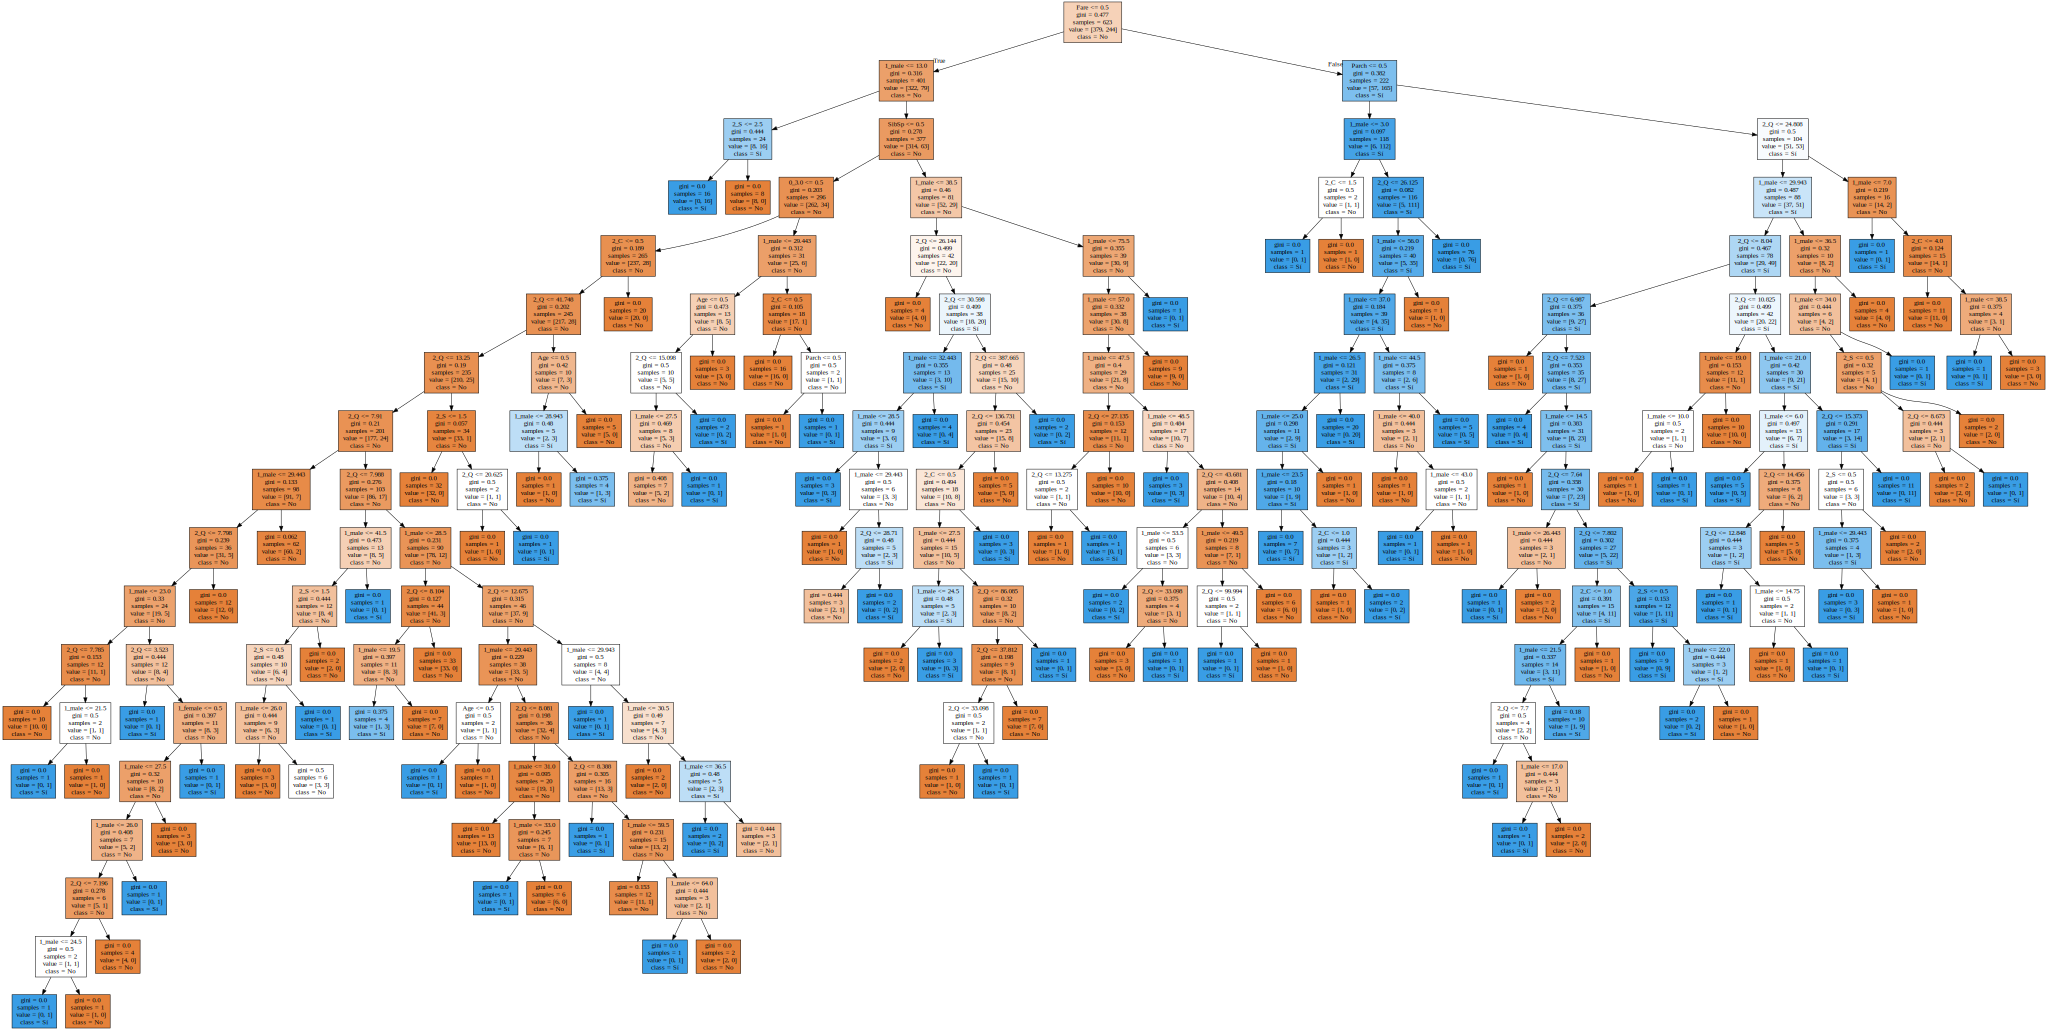

In [25]:
dot_data = export_graphviz(search.best_estimator_.named_steps.dt, out_file=None, feature_names = name_num + name_cat, class_names = ['No','Sí'], filled = True)
graphviz.Source(dot_data)

## Mismo a árbol a escala

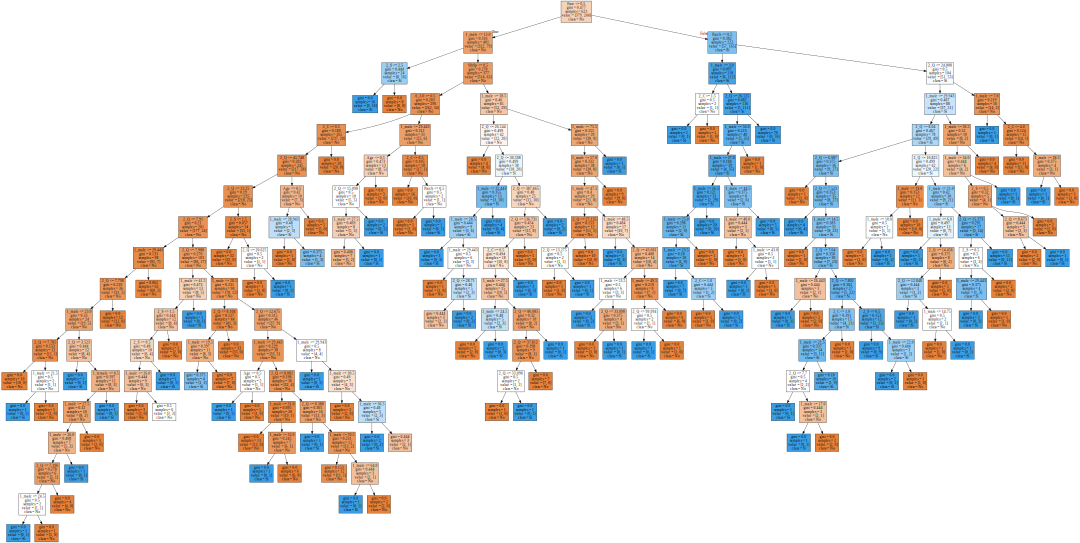

In [27]:
dot_data = export_graphviz(search.best_estimator_.named_steps.dt, out_file=None, feature_names = name_num + name_cat, class_names = ['No','Sí'], filled = True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"15,15!"')
graphviz.Source(pydot_graph.to_string())
#graphviz.Source(dot_data)
